In [1]:
#import Libraries
import numpy as np
import pandas as pd
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [4]:
tweets=pd.read_csv("Elon_musk.csv" ,encoding='Latin')
tweets.drop(['Unnamed: 0'],inplace=True,axis=1)
tweets=pd.read_csv("Elon_musk.csv" ,encoding='Latin')

In [5]:
"      ".strip()

''

In [6]:
tweets = [Text.strip() for Text in tweets.Text] # remove both the leading and the trailing characters
tweets = [Text for Text in tweets if Text] # removes empty strings, because they are considered in Python as False
tweets[0:5]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!']

In [7]:
# Joining the list into one string/text
tweets_text = ' '.join(tweets)
tweets_text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [8]:
#Punctuation
no_punc_text = tweets_text.translate(str.maketrans('', '', string.punctuation)) #with arguments (x, y, z) where 'x' and 'y'
# must be equal-length strings and characters in 'x'
# are replaced by characters in 'y'. 'z'
# is a string (string.punctuation here)
no_punc_text

'kunalb11 I\x92m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstco9WFKMYu2oj Frodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine It\x92s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha httpstcoFc9uhQSd7O freewal

In [9]:
#Tokenization
from nltk.tokenize import TweetTokenizer
tokens = TweetTokenizer(strip_handles=True)
tweet_tokens = tokens.tokenize(no_punc_text) #removes twitter username handles
print(tweet_tokens[0:50])  #displaying first 50 usernames involved

['kunalb', '11', 'I', '\x92', 'm', 'an', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera', '27', 'Doge', 'is', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of']


In [10]:
len(tweet_tokens)

22604

In [11]:
# remove http or any url within text
import re
no_url_text=re.sub(r'http\S+', '', no_punc_text)
no_url_text

'kunalb11 I\x92m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox  Frodo was the underdoge\nAll thought he would fail\nHimself most of all  OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest  geoffkeighley UnrealEngine It\x92s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha  freewalletorg Any crypto wallet that won\x92t give you your private keys should

In [12]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in tweet_tokens if not word in my_stop_words]
print(no_stop_tokens[0:50])

['kunalb', '11', 'I', '\x92', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera', '27', 'Doge', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'httpstco', '9WFKMYu2oj', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'httpstcozGxJFDzzrM', 'OwenSparks', 'flcnhvy', 'anonyx', '10']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91880\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91880\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
#Noramalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:50])

['kunalb', '11', 'i', '\x92', 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'joerogan', 'spotify', 'great', 'interview', 'gtera', '27', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'httpstco', '9wfkmyu2oj', 'frodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'httpstcozgxjfdzzrm', 'owensparks', 'flcnhvy', 'anonyx', '10']


In [14]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:50])

['kunalb', '11', 'i', '\x92', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tri', 'joerogan', 'spotifi', 'great', 'interview', 'gtera', '27', 'doge', 'underestim', 'teslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'now', 'next', 'even', 'happi', 'new', 'year', 'ox', 'httpstco', '9wfkmyu2oj', 'frodo', 'underdog', 'all', 'thought', 'would', 'fail', 'himself', 'httpstcozgxjfdzzrm', 'owenspark', 'flcnhvi', 'anonyx', '10']


In [15]:
import en_core_web_sm
nlp = en_core_web_sm.load()

In [17]:
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:50])

kunalb 11 I  alien IDAACarmack Ray tracing Cyberpunk HDR nextlevel Have tried joerogan Spotify Great interview gtera 27 Doge underestimated teslacn Congratulations Tesla China amazing execution last year Now next even Happy New Year Ox httpstco 9WFKMYu2oj Frodo underdoge All thought would fail Himself httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx 10


In [18]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:50])

['kunalb', '11', 'I', '\x92', 'alien', 'IDAACarmack', 'Ray', 'trace', 'Cyberpunk', 'HDR', 'nextlevel', 'have', 'try', 'joerogan', 'spotify', 'great', 'interview', 'gtera', '27', 'Doge', 'underestimate', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'httpstco', '9wfkmyu2oj', 'frodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'httpstcozgxjfdzzrm', 'OwenSparks', 'flcnhvy', 'anonyx', '10']


In [19]:
final_tweets=' '.join(lemmas)
final_tweets

'kunalb 11 I \x92 alien IDAACarmack Ray trace Cyberpunk HDR nextlevel have try joerogan spotify great interview gtera 27 Doge underestimate teslacn Congratulations Tesla China amazing execution last year now next even Happy New Year Ox httpstco 9wfkmyu2oj frodo underdoge all thought would fail himself httpstcozgxjfdzzrm OwenSparks flcnhvy anonyx 10 Haha thanks flcnhvy anonyx 10 Indeed tweet definitely represent realworld time allocation the entertaining outcome likely GiveDirectly just send just agree Clubhouse kanyewest httpstco 3rwe9uhsts geoffkeighley UnrealEngine it \x92 get real buy Dogecoin lil x toddler hodler JoshManMode he definitely issue sentencing seem bit high freewalletorg thank fix freewalletorg please unlock account AstroJordy U0001F923U0001F923 this true power haha httpstcoFc 9uhQSd7O freewalletorg any crypto wallet \x92 give private key avoid cost freewalletorg your app suck RT SpaceX NASA select Falcon Heavy launch first two element lunar Gateway together one mission

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)
print(vectorizer.vocabulary_)

{'kunalb': 3103, '11': 77, 'alien': 807, 'idaacarmack': 2842, 'ray': 4017, 'trace': 4891, 'cyberpunk': 1533, 'hdr': 2248, 'nextlevel': 3551, 'have': 2242, 'try': 4926, 'joerogan': 3024, 'spotify': 4510, 'great': 2180, 'interview': 2952, 'gtera': 2199, '27': 197, 'doge': 1686, 'underestimate': 5059, 'teslacn': 4737, 'congratulations': 1429, 'tesla': 4731, 'china': 1313, 'amazing': 832, 'execution': 1898, 'last': 3122, 'year': 5329, 'now': 3591, 'next': 3550, 'even': 1870, 'happy': 2229, 'new': 3547, 'ox': 3709, 'httpstco': 2335, '9wfkmyu2oj': 691, 'frodo': 2066, 'underdoge': 5058, 'all': 810, 'thought': 4816, 'would': 5305, 'fail': 1934, 'himself': 2294, 'httpstcozgxjfdzzrm': 2802, 'owensparks': 3706, 'flcnhvy': 2008, 'anonyx': 861, '10': 69, 'haha': 2214, 'thanks': 4775, 'indeed': 2891, 'tweet': 4948, 'definitely': 1588, 'represent': 4098, 'realworld': 4041, 'time': 4834, 'allocation': 812, 'the': 4782, 'entertaining': 1826, 'outcome': 3686, 'likely': 3184, 'givedirectly': 2151, 'just'

In [21]:
print(vectorizer.get_feature_names()[50:100])
print(X.toarray()[50:100])

['0rd', '0rg2qoaf', '0rm', '0rv0yq5q', '0s0ybscm0p', '0sjit', '0snf4ugyk', '0srlfg03fg', '0sz9cbzg', '0t2', '0thlr48n', '0v9gi47', '0vas3cck9p', '0vdefyc', '0wnuin', '0wwqstaxm', '0y5fkvqpk8', '0yo4jkbs2', '0yrjobe', '10', '100', '1000', '10000', '1028', '107', '10phoenix', '10x', '11', '112', '117', '11742', '11nikql', '11thhour', '12', '122', '12iq', '13', '13031925', '130pm', '13arm13arm', '13ericralph31', '14', '140pm', '147', '149watt', '14fozdo8', '14pksayi', '14yearold', '15', '150']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


C:\Users\91880\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [22]:
print(X.toarray().shape)

(16905, 5362)


In [23]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(lemmas)

In [24]:
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['45', 'actually', 'ajtourville', 'also', 'amp', 'austinbarnard', 'big', 'car', 'cleantechnica', 'come', 'cool', 'could', 'crew', 'day', 'dragon', 'earth', 'engine', 'ercxspace', 'erdayastronaut', 'evafoxu', 'exactly', 'falcon', 'felixschlang', 'first', 'flcnhvy', 'flight', 'get', 'go', 'good', 'great', 'haha', 'hard', 'high', 'httpstco', 'idaacarmack', 'it', 'kristennetten', 'land', 'launch', 'lexfridman', 'like', 'lot', 'make', 'marcushousegame', 'maybe', 'mission', 'model', 'much', 'nasa', 'nasaspaceflight', 'need', 'new', 'next', 'no', 'not', 'one', 'people', 'ppathole', 'pretty', 'probably', 'production', 'rationaletienne', 'right', 'rt', 'soon', 'space', 'spacestation', 'spacex', 'starship', 'still', 'sure', 'take', 'tesla', 'teslaownerssv', 'teslarati', 'tesmaniancom', 'test', 'that', 'the', 'thesheetztweetz', 'they', 'think', 'this', 'time', 'tobyliiiiiiiiii', 'true', 'u0001f923u0001f923', 'use', 'way', 'we', 'week', 'well', 'wholemarsblog', 'will', 'work', 'would', 'yeah', 'ye

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 500)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(lemmas)
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray())

['10', '100', '11742', '13031925', '15', '20', '247', '28delayslater', '30', '305', '3d', '3owner', '45', '60', '74', '85', '8p', 'able', 'absolutely', 'access', 'accurate', 'actually', 'adamklotz', 'add', 'ai', 'air', 'ajtourville', 'all', 'almost', 'already', 'also', 'although', 'amazing', 'amp', 'and', 'apply', 'appreciate', 'archillect', 'around', 'as', 'astrobehnken', 'astrodoug', 'astrojordy', 'astronaut', 'austinbarnard', 'autopilot', 'awesome', 'back', 'bad', 'bar', 'base', 'battery', 'bbcsciencenews', 'be', 'become', 'benmezrich', 'berlin', 'berniesanders', 'beta', 'big', 'bit', 'boca', 'bocachicagal', 'body', 'booster', 'boringcompany', 'bs', 'build', 'but', 'buy', 'call', 'camera', 'can', 'car', 'cargo', 'casparstanley', 'cbass', 'cell', 'change', 'cleantechnica', 'close', 'cold', 'come', 'company', 'complete', 'confirm', 'congratulations', 'control', 'cool', 'cost', 'could', 'course', 'cov', 'create', 'crew', 'critical', 'curevac', 'cyberpunkgame', 'cybertruck', 'day', 'dee

In [28]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [27]:
##Part Of Speech Tagging
nlp = spacy.load("en_core_web_sm")
one_block = final_tweets
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [29]:
all_ents=[]
for word in doc_block.ents:
    
    all_ents.append(word.label_)
set(all_ents)  

{'CARDINAL',
 'DATE',
 'EVENT',
 'FAC',
 'GPE',
 'LANGUAGE',
 'LAW',
 'LOC',
 'MONEY',
 'NORP',
 'ORDINAL',
 'ORG',
 'PERSON',
 'PRODUCT',
 'QUANTITY',
 'TIME',
 'WORK_OF_ART'}

In [30]:
doc_block = nlp(one_block)
for token in doc_block[:]:
    print(token,"==>", token.pos_)

kunalb ==> VERB
11 ==> NUM
I ==> PRON
 ==> PROPN
alien ==> PROPN
IDAACarmack ==> PROPN
Ray ==> PROPN
trace ==> NOUN
Cyberpunk ==> PROPN
HDR ==> PROPN
nextlevel ==> NOUN
have ==> AUX
try ==> VERB
joerogan ==> PROPN
spotify ==> VERB
great ==> ADJ
interview ==> NOUN
gtera ==> NOUN
27 ==> NUM
Doge ==> PROPN
underestimate ==> ADJ
teslacn ==> NOUN
Congratulations ==> PROPN
Tesla ==> PROPN
China ==> PROPN
amazing ==> ADJ
execution ==> NOUN
last ==> ADJ
year ==> NOUN
now ==> ADV
next ==> ADV
even ==> ADV
Happy ==> PROPN
New ==> PROPN
Year ==> PROPN
Ox ==> PROPN
httpstco ==> NOUN
9wfkmyu2oj ==> NUM
frodo ==> NOUN
underdoge ==> NOUN
all ==> DET
thought ==> NOUN
would ==> AUX
fail ==> VERB
himself ==> PRON
httpstcozgxjfdzzrm ==> ADP
OwenSparks ==> PROPN
flcnhvy ==> PROPN
anonyx ==> PROPN
10 ==> NUM
Haha ==> PROPN
thanks ==> PROPN
flcnhvy ==> PROPN
anonyx ==> PROPN
10 ==> NUM
Indeed ==> ADV
tweet ==> PROPN
definitely ==> ADV
represent ==> VERB
realworld ==> NOUN
time ==> NOUN
allocation ==> NOUN


In [31]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[5:50])

['interview', 'gtera', 'teslacn', 'execution', 'year', 'httpstco', 'frodo', 'underdoge', 'thought', 'fail', 'represent', 'realworld', 'time', 'allocation', 'outcome', 'agree', 'geoffkeighley', 'get', 'buy', 'lil', 'toddler', 'issue', 'sentencing', 'seem', 'bit', 'freewalletorg', 'thank', 'fix', 'unlock', 'account', 'power', 'haha', 'freewalletorg', 'wallet', 'give', 'avoid', 'cost', 'freewalletorg', 'app', 'suck', 'select', 'launch', 'element', 'mission', 'predict']


In [32]:
#Sentiment analysis
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [33]:
afinn.sample(10)

,word,value
174,arrogant,-2
2210,tears,-2
679,disappointment,-2
2212,tense,-2
1018,frauds,-4
1821,rainy,-1
295,boldly,2
969,favorite,2
2357,verdicts,-1
2425,wicked,-2


In [34]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(tweets))
sentences[:10]

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [35]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
919,"@kenyanwalstreet Not actually a payout, just a..."
920,"It may never pay out, as the stock cant b ht..."
921,Details Aug 28.
922,AI symbiosis while u wait @vistacruiser7 @flcn...


In [36]:
affinity_scores = afinn.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [37]:
def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += affinity_scores.get(word.lemma_, 0)
    return sent_score

In [38]:
# test that it works
calculate_sentiment(text = 'happy birthday')

3

In [39]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)
sent_df

,sentence,sentiment_value
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0
1,Have you tried it?,0
2,@joerogan @Spotify Great interview!,3
3,@gtera27 Doge is underestimated @teslacn Congr...,3
4,Now on to the next for even more!!,0
...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0
920,"It may never pay out, as the stock cant b ht...",-4
921,Details Aug 28.,0
922,AI symbiosis while u wait @vistacruiser7 @flcn...,-2


In [40]:
sent_df.sort_values(by='sentiment_value').sample(20)

,sentence,sentiment_value
907,"Technically, https://t.co/TcIVzvc5RA @MightyT...",0
717,"Note, legs will be bigger &amp; there https:...",-1
660,@EvaFoxU That number sure comes up a lot <U+00...,2
479,@enn_nafnlaus @electricfuture5 <U+0001F923><U+...,-1
652,"Its not useful for predicting the future, nor...",9
193,@elonmusk #spacex #SpaceXStarship https://t.co...,1
822,@PPathole @RhiddhiD Ya just cant beat BR http...,0
28,@AstroJordy Yes Lessons learned Of Earth and M...,1
503,@raytech247 @WholeMarsBlog Even GM &amp; Chrys...,-3
125,Building ~1000 Starships to create a s https:...,0


In [41]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    924.000000
mean       1.419913
std        2.760398
min       -8.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       18.000000
Name: sentiment_value, dtype: float64

In [42]:
# Sentiment score of the whole reviews which have negative scores
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0
1,Have you tried it?,0
4,Now on to the next for even more!!,0
5,Happy New Year of the Ox!,0
6,https://t.co/9WFKMYu2oj Frodo was the underdog...,-2
...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0
920,"It may never pay out, as the stock cant b ht...",-4
921,Details Aug 28.,0
922,AI symbiosis while u wait @vistacruiser7 @flcn...,-2


In [43]:
#reviews which are having sentiment scores greater than 10
sent_df[sent_df['sentiment_value']>=10].head()

,sentence,sentiment_value
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",18
81,@teslaownersSV This is a good one @MrBeastYT I...,13
102,@BoredElonMusk <U+0001F923><U+0001F923> @erigg...,11
105,@Erdayastronaut @SpaceX Was also thinking that...,16
151,"@GUNMTLM3 @lexfridman No, but definitely this ...",10


In [44]:
sent_df.loc[20]["sentence"]

'Improve ship &amp; booster mass @michaelhodapp_ Back to work tonight!'

C:\Users\91880\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

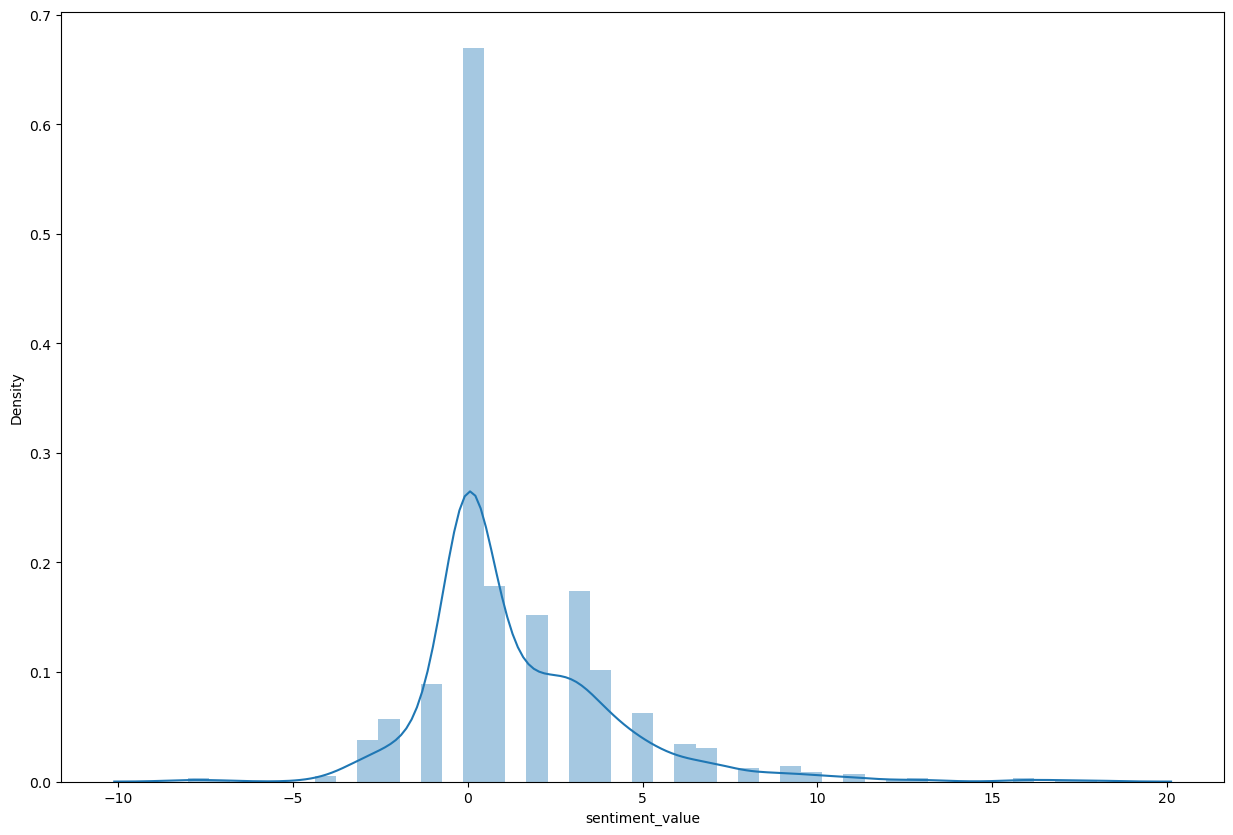

In [45]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])